In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import rotate

def rotate_3d_distribution(matrix, angle_x, angle_y, angle_z):
    # Convert angles to radians
    angle_x = np.radians(angle_x)
    angle_y = np.radians(angle_y)
    angle_z = np.radians(angle_z)

    # Rotation matrices
    rotation_x = np.array([[1, 0, 0],
                           [0, np.cos(angle_x), -np.sin(angle_x)],
                           [0, np.sin(angle_x), np.cos(angle_x)]])

    rotation_y = np.array([[np.cos(angle_y), 0, np.sin(angle_y)],
                           [0, 1, 0],
                           [-np.sin(angle_y), 0, np.cos(angle_y)]])

    rotation_z = np.array([[np.cos(angle_z), -np.sin(angle_z), 0],
                           [np.sin(angle_z), np.cos(angle_z), 0],
                           [0, 0, 1]])

    # Combine rotation matrices
    rotation_matrix = rotation_z.dot(rotation_y).dot(rotation_x)

    # Flatten the matrix to a list of particles
    particles = matrix.reshape(-1, 3)

    # Apply rotation to each particle
    rotated_particles = np.dot(rotation_matrix, particles.T).T

    # Reshape the result back to the original matrix shape
    rotated_matrix = rotated_particles.reshape(matrix.shape)

    return rotated_matrix
# doesnt work use ndimage.rotate


In [22]:
def rho(x,y,z,e,p,q,rho0,s,a,b):
    r = ((np.abs(x)**(2 - e) + (np.abs(y) / p)**(2 - e) + (np.abs(z) / q)**(2 - e)))**(1/(2-e))
    return rho0 / ((r/s)**a*(1+(r/s))**(b-a))

In [23]:
def plot_triaxial_ellipsoid_const(p1, e1):
    
    a = 2  
    b = 1  
    c = 1  #

    # Define the grid of points
    x_range = np.linspace(-a, a, 100)
    y_range = np.linspace(-b, b, 100)
    z = 0

    x_grid, y_grid = np.meshgrid(x_range, y_range)


    p = p1
    q = 1 #c/a
    e= e1
    rho0 = 100
    s=1
    aa = 2
    bb = 4
    
    rh = rho(x_grid,y_grid,z,e,p,q,rho0,s,aa,bb)

    # Create the contour plot
    plt.figure(figsize=(8, 6))
    contour = plt.contour(x_grid,y_grid, np.log(rh), levels=10, colors='b')
    plt.clabel(contour, inline=1, fontsize=10)
    plt.title('Contour Plot of Triaxial Ellipsoid')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.show()

(-0.25, 0.25)

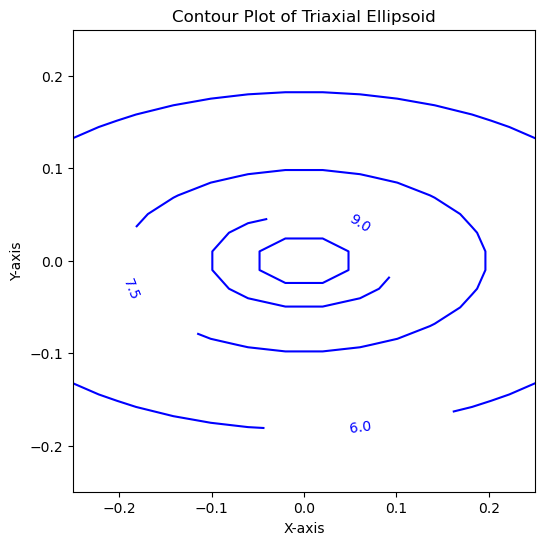

In [24]:
plot_triaxial_ellipsoid_const(0.5,0)
plt.xlim(-0.25,0.25)
plt.ylim(-0.25,0.25)

(-0.25, 0.25)

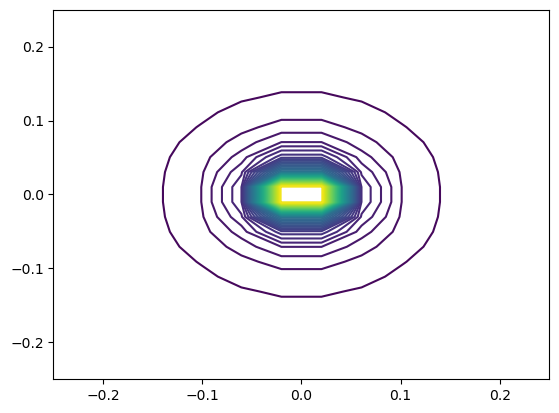

In [25]:
a = 2  
b = 1  
c = 1  #

# Define the grid of points
x_range = np.linspace(-a, a, 100)
y_range = np.linspace(-b, b, 100)
z = 0

x_grid, y_grid = np.meshgrid(x_range, y_range)


p = 1
q = 1 #c/a
e= 0
rho0 = 1
s=1
aa = 2
bb = 4

rh = rho(x_grid,y_grid,z,e,p,q,rho0,s,aa,bb)
rh.shape
plt.contour(x_grid, y_grid, rh,  levels=50)
plt.xlim(-0.25,0.25)
plt.ylim(-0.25,0.25)

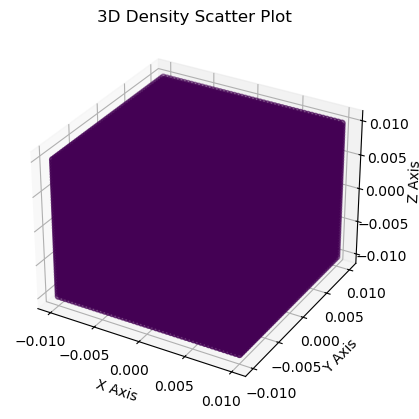

In [26]:
## e = 0
s = 1 
e = 0
p = 0.8
q = 0.6
a = 2
b = 4
rho0 = 0.001


# Define the size of your 3D matrix
x_size, y_size, z_size = 50, 50, 50

# Create 3D coordinates
x, y, z = np.meshgrid(np.linspace(-0.01, 0.01, x_size),
                      np.linspace(-0.01, 0.01, y_size),
                      np.linspace(-0.01, 0.01, z_size))

# Evaluate the density function at each coordinate
density_matrix = rho(x, y, z,e,p,q,rho0,s,a,b)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=density_matrix.flatten(), cmap='viridis')

# Customize the plot (optional)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Density Scatter Plot')

# Show the plot
plt.show()

(-0.001, 0.001)

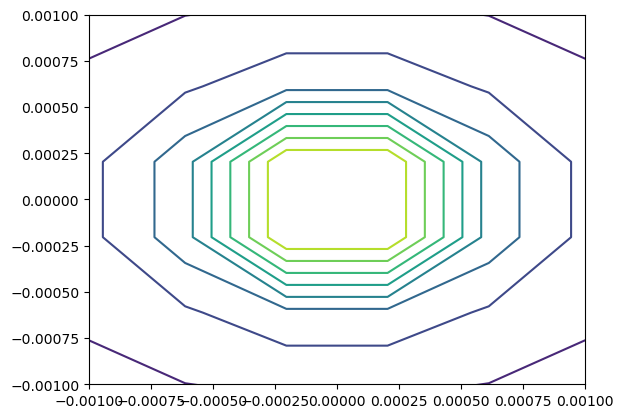

In [27]:
plt.contour(x[:, :, 25], y[:, :, 25], density_matrix[:, :, 25],  levels=10)
plt.xlim(-0.001,0.001)
plt.ylim(-0.001,0.001)

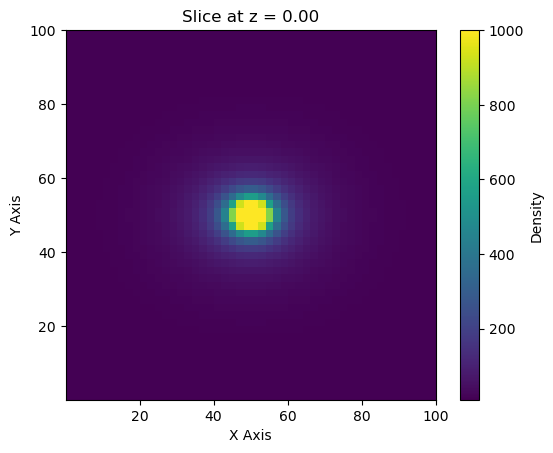

In [28]:
vmin = density_matrix.min()
vmax = density_matrix.max()

fig, ax = plt.subplots()
cax = ax.imshow(density_matrix[:, :, 25], cmap='viridis', extent=(0.1, 100, 0.1, 100), origin='lower', vmin=10, vmax=1000)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
plt.colorbar(cax, label='Density')
ax.set_title(f'Slice at z = {z[0, 0, 25]:.2f}')

# Show the plot
plt.show()

In [29]:
z[0, 0, 10]

-0.005918367346938775

In [30]:
projection = np.sum(density_matrix, axis = 2)

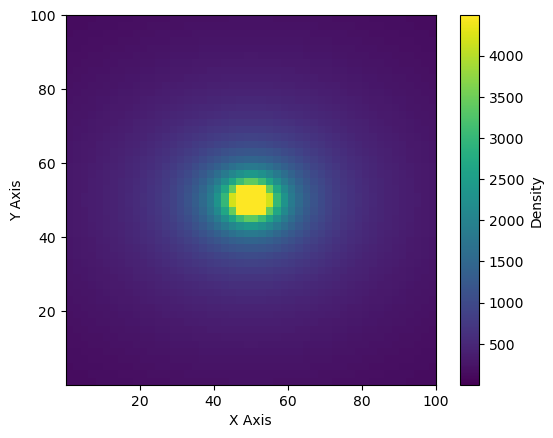

In [31]:
fig, ax = plt.subplots()
cax = ax.imshow(projection, cmap='viridis', extent=(0.1, 100, 0.1, 100), origin='lower', vmin=vmin, vmax=vmax)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
plt.colorbar(cax, label='Density')

# Show the plot
plt.show()

In [32]:
density_matrix.shape

(50, 50, 50)

In [33]:
rotated_matrix = rotate(density_matrix, angle=90, axes=(0, 1), reshape=False)
# axes defines the two axis that span the plane of rotation, 0 =x 1 =y so we are rotating around the z axis, angle in degrees
projection = np.sum(rotated_matrix, axis = 2)

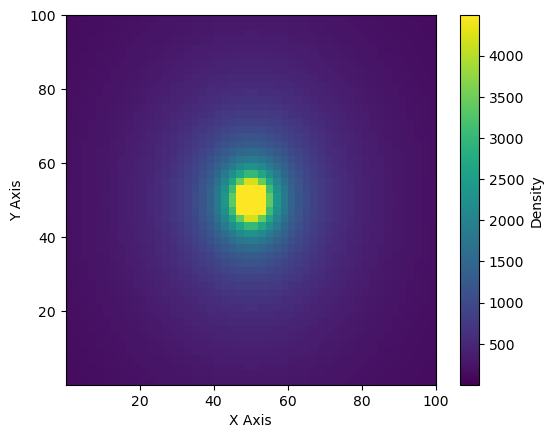

In [34]:
fig, ax = plt.subplots()
cax = ax.imshow(projection, cmap='viridis', extent=(0.1, 100, 0.1, 100), origin='lower', vmin=vmin, vmax=vmax)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
plt.colorbar(cax, label='Density')

# Show the plot
plt.show()

In [35]:
type(len(x)/2)

float

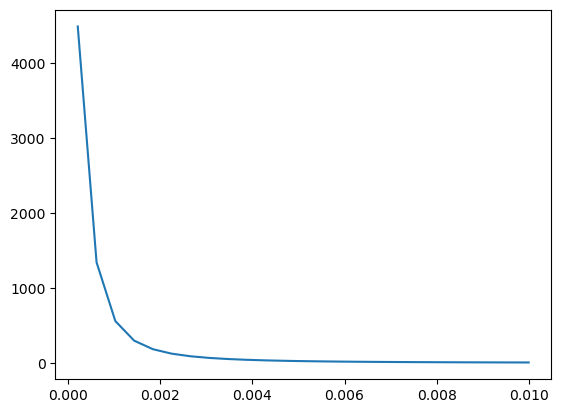

In [36]:
plt.plot(x[0,int(len(x)/2):,0],density_matrix[int(len(x)/2):,24,24])

In [37]:
density_matrix[:,24,24]

array([   6.236593  ,    6.78489983,    7.40813267,    8.12055167,
          8.93997307,    9.88888775,   10.99601248,   12.2984761 ,
         13.84495572,   15.70026509,   17.95221693,   20.72214262,
         24.18147547,   28.57873951,   34.28511632,   41.87474076,
         52.27351938,   67.05213973,   89.04715547,  123.80446146,
        183.35473028,  297.76347571,  558.95960762, 1343.51386004,
       4491.78303989, 4491.78303989, 1343.51386004,  558.95960762,
        297.76347571,  183.35473028,  123.80446146,   89.04715547,
         67.05213973,   52.27351938,   41.87474076,   34.28511632,
         28.57873951,   24.18147547,   20.72214262,   17.95221693,
         15.70026509,   13.84495572,   12.2984761 ,   10.99601248,
          9.88888775,    8.93997307,    8.12055167,    7.40813267,
          6.78489983,    6.236593  ])

In [38]:
np.max(density_matrix)

4491.78303989417

In [39]:
max_value = np.amax(density_matrix)
max_index = np.unravel_index(np.argmax(density_matrix), density_matrix.shape)

In [40]:
max_index

(24, 24, 24)